In [1]:
import numpy as np
import astra
import tomopy
import dxchange

import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
fname = '/home/carminati_c/Downloads/tooth.h5'
start = 0
end = 2

In [3]:
proj, flat, dark, theta = dxchange.read_aps_32id(fname, sino=(start, end))

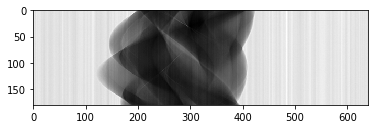

In [4]:
plt.imshow(proj[:, 0, :], cmap='Greys_r')
plt.show()


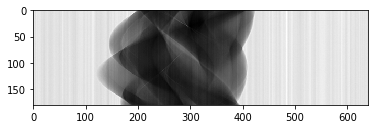

(181, 2, 640)


In [5]:
plt.imshow(proj[:, 0, :], cmap='Greys_r')
plt.show()
print(np.shape(proj))

In [6]:
if (theta is None):
    theta = tomopy.angles(proj.shape[0])
else:
    pass

In [7]:
proj = tomopy.normalize(proj, flat, dark)

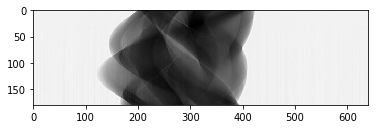

In [8]:
plt.imshow(proj[:, 0, :], cmap='Greys_r')
plt.show()

In [9]:
rot_center = tomopy.find_center(proj, theta, init=290, ind=0, tol=0.5)

In [10]:
proj = tomopy.minus_log(proj)

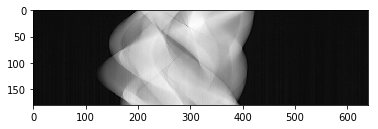

In [11]:
plt.imshow(proj[:, 0, :], cmap='Greys_r')
plt.show()

In [12]:
recon = tomopy.recon(proj, theta, center=rot_center, algorithm='gridrec')

In [13]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)

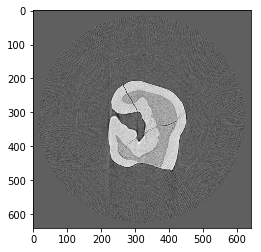

(2, 640, 640)


In [14]:
plt.imshow(recon[1, :,:], cmap='Greys_r')
plt.show()
print(np.shape(recon))

In [32]:
options = {'proj_type':'linear', 'method':'SIRT', 'num_iter':200}


In [33]:
recon = tomopy.recon(proj, theta, center=rot_center, algorithm=tomopy.astra, options=options) # makes the kernel to die.. :(


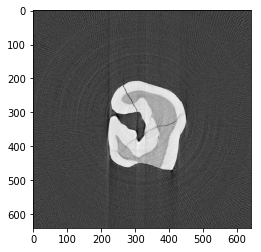

(2, 640, 640)


In [34]:
plt.imshow(recon[1, :,:], cmap='Greys_r')
plt.show()
print(np.shape(recon))

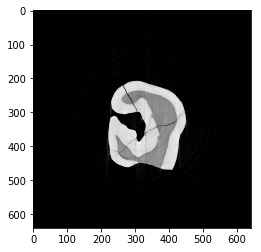

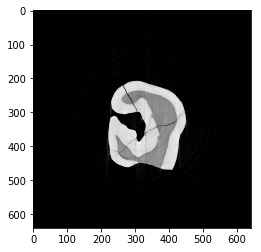

In [49]:
extra_options ={'MinConstraint':0}
options = {'proj_type':'linear', 'method':'SIRT_CUDA', 'num_iter':200, 'extra_options':extra_options}
recon = tomopy.recon(proj, theta, center=rot_center, algorithm=tomopy.astra, options=options)
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)
plt.figure()
plt.imshow(recon[1, :,:], cmap='Greys_r')
plt.show()

plt.figure()
plt.imshow(recon[0, :,:], cmap='Greys_r')
plt.show()


In [45]:
# print(theta)
print(np.shape(proj), np.shape(theta), np.shape(recon))


(181, 2, 640) (181,) (2, 640, 640)


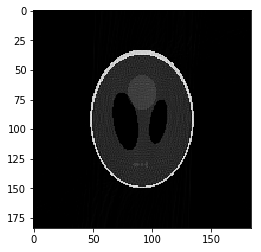

In [57]:
import tomopy
obj = tomopy.shepp3d() # Generate an object.
ang = tomopy.angles(180) # Generate uniformly spaced tilt angles.
sim = tomopy.project(obj, ang) # Calculate projections.

# Reconstruct object:
rec = tomopy.recon(sim, ang, algorithm=tomopy.astra,
       options={'method':'SART', 'num_iter':10*180,
       'proj_type':'linear',
       'extra_options':{'MinConstraint':0}})

# Show 64th slice of the reconstructed object.
import pylab
pylab.imshow(rec[64], cmap='gray')
pylab.show()

In [58]:
print(np.shape(rec), np.shape(sim))

(128, 184, 184) (180, 128, 184)


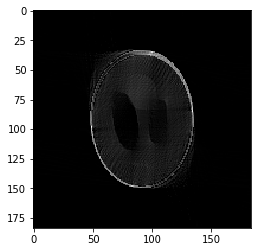

In [66]:
# Reconstruct object:
rec = tomopy.recon(sim[0:90,:,:], ang[0:90], algorithm=tomopy.astra,
       options={'method':'SART', 'num_iter':20*180,
       'proj_type':'linear',
       'extra_options':{'MinConstraint':0}})

# Show 64th slice of the reconstructed object.
import pylab
pylab.imshow(rec[64], cmap='gray')
pylab.show()

In [67]:
print(np.shape(rec), np.shape(sim))

(128, 184, 184) (180, 128, 184)


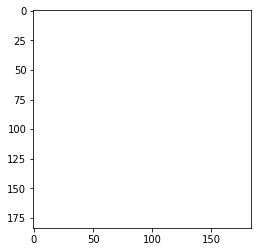

In [70]:
# Reconstruct object:
rec = tomopy.recon(sim[0:90,:,:], ang[0:90], algorithm=tomopy.astra,
       options={'method':'SART_CUDA', 'num_iter':20*180,
       'proj_type':'linear',
       'extra_options':{'MinConstraint':0}})

# Show 64th slice of the reconstructed object.


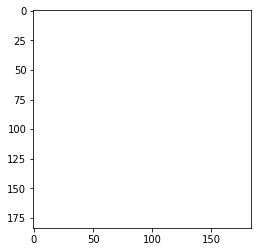

nan nan


/home/carminati_c/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [72]:
import pylab
pylab.imshow(rec[32], cmap='gray')
pylab.show()
print(np.max(rec), np.min(rec))

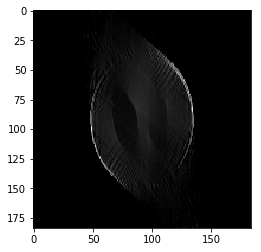

In [73]:
# Reconstruct object:
rec = tomopy.recon(sim[0:45,:,:], ang[0:45], algorithm=tomopy.astra,
       options={'method':'SART', 'num_iter':20*180,
       'proj_type':'linear',
       'extra_options':{'MinConstraint':0}})

# Show 64th slice of the reconstructed object.
import pylab
pylab.imshow(rec[64], cmap='gray')
pylab.show()

In [ ]:
# Reconstruct object:
rec = tomopy.recon(sim[0:45,:,:], ang[0:45], algorithm=tomopy.astra,
       options={'method':'SIRT', 'num_iter':20*180,
       'proj_type':'linear',
       'extra_options':{'MinConstraint':0}})

# Show 64th slice of the reconstructed object.
import pylab
pylab.imshow(rec[64], cmap='gray')
pylab.show()

In [ ]:
# # -------------------------------------------------------------------
# # This script performs a complete reconstruction workflow.
# # The reconstruction algorithm used is the SIRT performed on a GPU.
# # -------------------------------------------------------------------

# # set pixel size in cm
# pixel_size  = 0.0029

# # set the last angle value of the CT scan: np.pi or 2*np.pi
# last_angle = 2*np.pi

# # read dataset containg projection, dark-field, flat-field images and the projection at 180 degree
# proj, dark, flat, proj_180 = ntp.read_dataset()

# # normalize the projections to dark-field, flat-field images and neutron dose
# norm, norm_180 = ntp.normalize_proj(proj, dark, flat, proj_180=proj_180, dose_draw=True, crop_draw=True)

# # rotation axis tilt correction
# norm = ntp.correction_COR(norm, norm[0], norm_180)

# # clean up memory
# del dark; del flat; del proj; del proj_180

# # remove outliers, set the optimal radius and threshold
# norm = ntp.remove_outliers_stack(norm, radius=1, threshold=0.018, outliers='dark', out=norm)
# norm = ntp.remove_outliers_stack(norm, radius=3, threshold=0.018, outliers='bright', out=norm)

# # perform minus-log transform
# norm =  ntp.log_transform(norm, out=norm)

# # remove stripes in sinograms
# norm = ntp.remove_stripe_stack(norm, level=4, wname='db30', sigma=1.5, out=norm)

# # define the array of the angle views in radians
# angles = np.linspace(0, last_angle, norm.shape[0], endpoint=False)

# # SIRT reconstruction with 100 iterations using GPU
# print('> Reconstruction...')
# rec    = ntp.reconstruct(norm, angles, 'SIRT_CUDA', parameters={"iterations":100}, pixel_size=pixel_size)

# # select the directory and the prefix file name of the reconstructed images to save.
# recon_dir = ntp.save_filename_gui('', message = 'Select the folder and the prefix name for the reconstructed images...')

# # write the reconstructed images to disk
# ntp.write_tiff_stack(recon_dir, rec)